In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
#df.set_index('login_time',inplace=True)
df['count'] = 1
resample = df.resample('15T',how='count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '# of Logins')

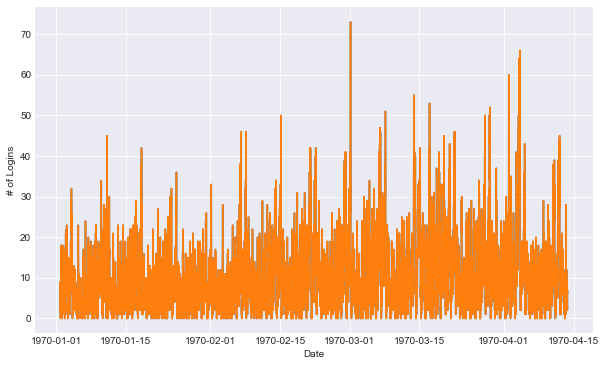

In [8]:

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,6))
plt.plot(resample)
plt.xlabel('Date')
plt.ylabel('# of Logins')

In [9]:
df = df.reset_index()

In [10]:
#del df['count']

In [12]:
#df.set_index('login_time',inplace=True)
df['count'] = 1
resample = df.resample('D',how='count')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]), <a list of 8 Text xticklabel objects>)

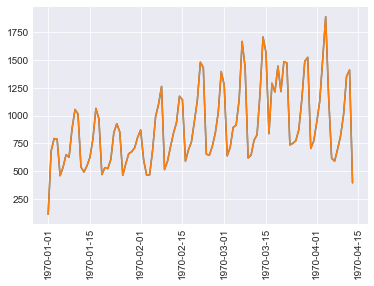

In [13]:
# BY DAY
plt.plot(resample)
plt.xticks(rotation=90)

(array([719177., 719194., 719208., 719222., 719236., 719253., 719267.]),
 <a list of 7 Text xticklabel objects>)

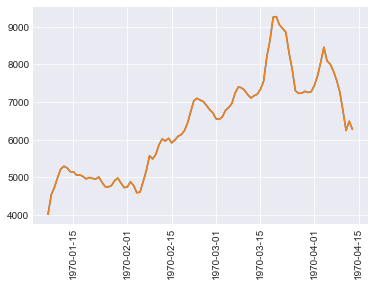

In [14]:
#BY WEEK
plt.plot(resample.rolling(7).sum())
plt.xticks(rotation=90)

In [15]:
resample.reset_index(inplace=True)

In [16]:
resample.groupby(resample['login_time'].dt.strftime('%B'))['count'].sum()

login_time
April       13507
February    24673
January     21239
March       33723
Name: count, dtype: int64

In [17]:
dayOfWeek = resample.groupby(resample['login_time'].dt.strftime('%A'))['count'].sum()
dayOfWeek

login_time
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: count, dtype: int64

In [18]:
x = pd.DataFrame(dayOfWeek).reset_index()

In [19]:
x

,login_time,count
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


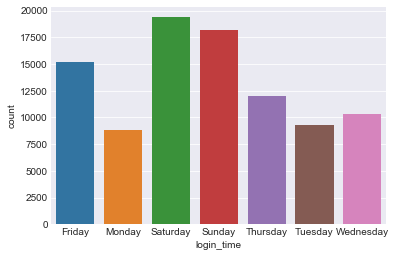

In [20]:
sns.barplot(x='login_time',y='count',data=x)

In [21]:
hourly = resample.groupby(resample['login_time'].dt.strftime('%H'))['count'].sum()

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. In my mind, there are a few key performance metrics to choose from that could be a measure of success for this experiment that encourages partners to serve both cities. 
         - Probably the biggest metric is profit, the drivers would be more persuaded to work both cities if there is an incentive for them
         - Another metric could be the number of users using their services will increase if they work both cities
       
2. I would use an A/B test in this situation. One group would be the drivers that travel between the two cities, all the while calculating the profit they accrue. The second group would be drivers that provide services in their respective cities only and calculating their profits. This experiment should be done in a long term and short term situation, in order to find out if the profits change over a specific time frame.
    After that a statistic test for this experiment would be a t-test. Depending on the results, the city will need to show the drivers that they can make more money, based on the results of their tests, by driving between the two cities.
        - The experiment will show if it rejects the null or fails to reject the null and based on that the city and driverst will figure out what is needed to have drivers drive between the two cities.

In [66]:
import json
f = open('ultimate_data_challenge.json','r')
df = json.load(f)

In [67]:
df = pd.DataFrame(df)

In [68]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [69]:
max(df['last_trip_date'])

Timestamp('2014-07-01 00:00:00')

In [70]:
from datetime import datetime, timedelta
import dateutil.relativedelta
df['active'] = np.where(df['last_trip_date'] >= max(df['last_trip_date']) - timedelta(30),1,0)

In [71]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
active                       0
dtype: int64

In [211]:
#df[df['phone'].isnull()]

In [95]:
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(),inplace=True)
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(),inplace=True)


In [96]:
df.isnull().sum()


avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
active                      0
dtype: int64

In [121]:
# 37.6% retained
df.active.value_counts()[1]/50000

0.37608

In [27]:
x = pd.to_datetime('2014-06-17')

In [100]:
x = df.corr()

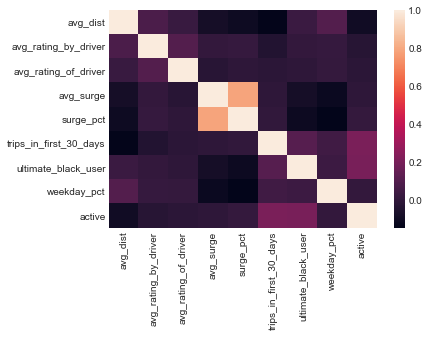

In [101]:
sns.heatmap(x)

In [147]:
df._get_numeric_data().head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0


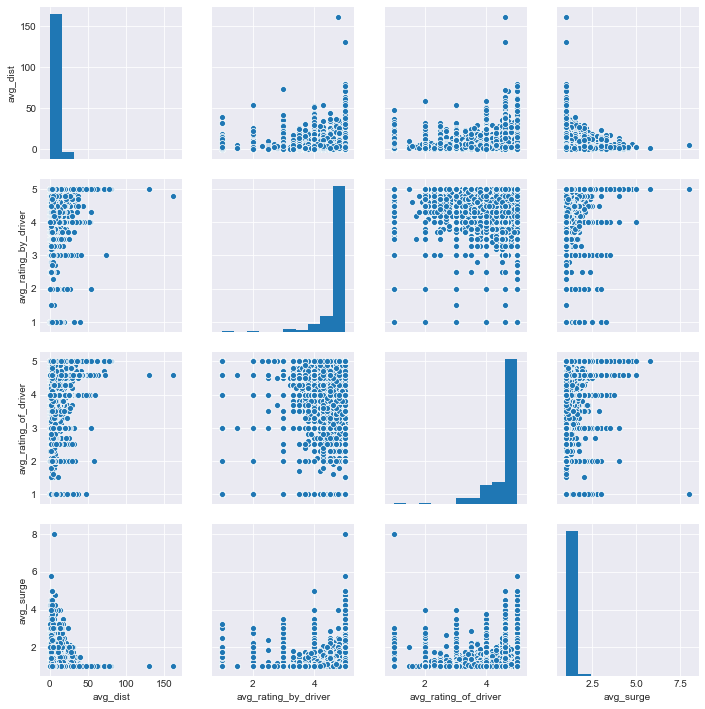

In [117]:
df._get_numeric_data()
sns.pairplot(df.iloc[:,0:6])

In [122]:
newdf = pd.get_dummies(df, columns=['city', 'ultimate_black_user', 'phone'], drop_first=True)

In [123]:
newdf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active,city_King's Landing,city_Winterfell,ultimate_black_user_True,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,0,1,0,0


In [131]:
X = newdf.drop(['active','signup_date','last_trip_date'],axis=1)
y = newdf.active

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [134]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [136]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.74      0.85      0.79      9379
          1       0.66      0.50      0.57      5621

avg / total       0.71      0.72      0.71     15000



In [137]:
svm = SVC()
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

In [138]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.85      0.82      9379
          1       0.71      0.62      0.66      5621

avg / total       0.76      0.76      0.76     15000



In [141]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)

In [142]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.78      0.83      0.80      9379
          1       0.68      0.61      0.64      5621

avg / total       0.74      0.74      0.74     15000



In [143]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pred = gb.predict(X_test)

In [144]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.85      0.83      9379
          1       0.73      0.66      0.70      5621

avg / total       0.78      0.78      0.78     15000



In [145]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
pred = ab.predict(X_test)

In [146]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.80      0.85      0.83      9379
          1       0.73      0.65      0.68      5621

avg / total       0.77      0.78      0.77     15000



In [189]:
#rf.feature_importances_
importances = gb.feature_importances_
feat_names = newdf.drop(['signup_date','last_trip_date','active'],axis=1).columns
#zipp = pd.DataFrame().items())
importances

array([0.1150218 , 0.08832683, 0.05420157, 0.02931738, 0.1291277 ,
       0.13894306, 0.17725335, 0.08404076, 0.05199471, 0.06479679,
       0.06697606])

In [191]:
features = pd.DataFrame(feat_names)

In [193]:
features['prob'] = importances

Text(0.5, 0, 'features')

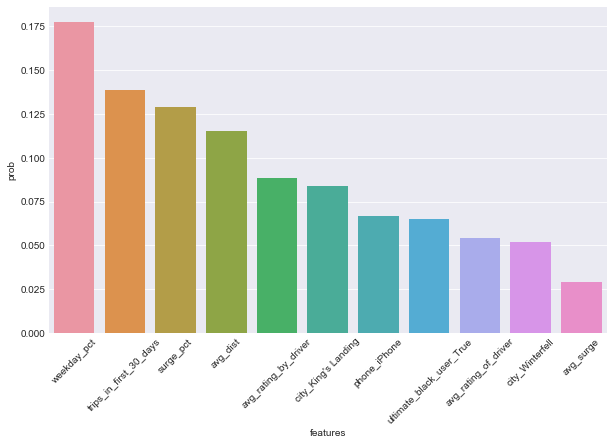

In [210]:
features = features.sort_values(by='prob',ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)

sns.barplot(x=0,y='prob',data=features)
plt.xlabel('features')

I used five different learning algorithms to create five ML models and find the one that predicted the active users the best. From Logistic Regression, SVM, Random Forest, Gradient Boosting, and Ada Boosting, Gradient Boosting predicted the best with a 78% accuracy. The Boosting and bagging algorithms perform better since they are more complex. Looking at the feature importance graph, we see weekday percentage, trips in first 30 days, and surge percentage were the features that were of most importance in the gradient boosting model. To get more active users they should focus on the group of people who need to use car services on the weekdays.